# 42047: Data Processing Using Python
ASSIGNMENT (Part B) : Code/iPython Notebook: Data Analysis and Visualization


## Bussiness Problem

##### To analyze current players and to create a team of Top players for each position:



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

#plt.style.use('bmh')
pd.options.display.float_format = '{:.3f}'.format

In [3]:
laliga = pd.read_csv('lalaiga 2 all player final - lalaiga 2 all player.csv')

In [5]:
laliga.head(10)

,Player Name,Team-name,Age,Position,App,MinP,Goals,Assist,YC,RC,SPG,PS%,AW,MOTM,Rating
0,Robert Lewandowski,Barcelona,34,FW,20(1),1682,15.000,5.000,NaN,1.000,3.800,79,1.600,7.000,7.530
1,Karim Benzema,Real Madrid,35,FW,15,1306,11.000,3.000,1.000,NaN,4.700,87,0.700,4.000,7.450
2,Antoine Griezmann,Atletico,31,AM(CLR) FW,18(7),1693,8.000,8.000,NaN,NaN,2.600,81.5,0.800,5.000,7.450
3,Vinícius Júnior,Real Madrid,22,AM(L) FW,24,2122,8.000,4.000,8.000,NaN,2.500,82.3,NaN,4.000,7.380
4,Pedri,Barcelona,20,AM(CL),18(3),1634,6.000,NaN,2.000,NaN,0.800,88.5,NaN,3.000,7.280
5,Federico Valverde,Real Madrid,24,M(CLR),22(),1960,7.000,2.000,2.000,NaN,2.100,88.2,0.900,4.000,7.260
6,Mikel Merino,Real Sociedad,26,M(C),18(3),1607,1.000,7.000,5.000,1.000,1.500,76.8,3.500,5.000,7.230
7,Joselu,Espanyol,32,FW,21(23),1909,12.000,2.000,3.000,NaN,2.500,61.6,5.600,4.000,7.220
8,Rodrygo,Real Madrid,22,AM(CLR) FW,16(6),1546,4.000,5.000,2.000,NaN,2.900,89.9,0.500,2.000,7.200
9,Memphis Depay,Barcelona,29,AM(CL) FW,2,116,1.000,NaN,NaN,NaN,3.000,83.9,0.500,NaN,7.200


In [4]:
laliga.tail(3)


,Player Name,Team-name,Age,Position,App,MinP,Goals,Assist,YC,RC,SPG,PS%,AW,MOTM,Rating
539,Álvaro Giménez,Cadiz,31,FW,0(1),16,NaN,NaN,NaN,NaN,NaN,100,NaN,NaN,5.820
540,John Donald,Elche,22,D(C),2(1),151,NaN,NaN,NaN,1.000,NaN,87.5,0.700,NaN,5.710
541,Diego López,Rayo Vallecano,41,GK,1,90,NaN,NaN,NaN,NaN,NaN,70.8,NaN,NaN,4.630


In [5]:
laliga.info

<bound method DataFrame.info of             Player Name       Team-name  Age       Position    App  MinP  \
0    Robert Lewandowski       Barcelona   34             FW  20(1)  1682   
1         Karim Benzema     Real Madrid   35             FW     15  1306   
2     Antoine Griezmann        Atletico   31     AM(CLR) FW  18(7)  1693   
3       Vinícius Júnior     Real Madrid   22       AM(L) FW     24  2122   
4                 Pedri       Barcelona   20         AM(CL)  18(3)  1634   
..                  ...             ...  ...            ...    ...   ...   
537      Carlos Álvarez         Sevilla   19     Midfielder   0(1)     9   
538       Tomás Alarcón           Cadiz   24            DMC   2(2)   222   
539      Álvaro Giménez           Cadiz   31             FW   0(1)    16   
540         John Donald           Elche   22           D(C)   2(1)   151   
541         Diego López  Rayo Vallecano   41             GK      1    90   

     Goals  Assist    YC    RC   SPG   PS%    AW  MOTM 

In [6]:
print(laliga.shape)

(542, 15)


In [7]:
print(laliga.columns)

Index(['Player Name', 'Team-name', 'Age', 'Position', 'App', 'MinP', 'Goals',
       'Assist', 'YC', 'RC', 'SPG', 'PS%', 'AW', 'MOTM', 'Rating'],
      dtype='object')


# Checking Null Values

In [8]:
#Finding Missing Values in the dataset
laliga.isnull().sum()

Player Name      0
Team-name        0
Age              0
Position         0
App              1
MinP             0
Goals          326
Assist         336
YC             148
RC             450
SPG            102
PS%              0
AW              86
MOTM           391
Rating           0
dtype: int64

We will keep the null value for all the variables expect minutes played(MinP) because a player can play a full game but not score any goals and provide no assist or save.

# Checking Duplicate Values


In [9]:
#Finding Duplicate rows in the dataframe
duplicate_rows_laliga = laliga[laliga.duplicated()]
print("number of duplicate rows: {}".format(duplicate_rows_laliga.shape))
laliga = laliga.drop_duplicates()

number of duplicate rows: (0, 15)


# Checking Statistics for different data types


In [10]:
laliga.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542 entries, 0 to 541
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player Name  542 non-null    object 
 1   Team-name    542 non-null    object 
 2   Age          542 non-null    int64  
 3   Position     542 non-null    object 
 4   App          541 non-null    object 
 5   MinP         542 non-null    int64  
 6   Goals        216 non-null    float64
 7   Assist       206 non-null    float64
 8   YC           394 non-null    float64
 9   RC           92 non-null     float64
 10  SPG          440 non-null    float64
 11  PS%          542 non-null    object 
 12  AW           456 non-null    float64
 13  MOTM         151 non-null    float64
 14  Rating       542 non-null    float64
dtypes: float64(8), int64(2), object(5)
memory usage: 67.8+ KB


In [11]:
#Checking statistics for columns of the int64 and float 64 data type
laliga.describe(include=['int64', 'float64'])

,Age,MinP,Goals,Assist,YC,RC,SPG,AW,MOTM,Rating
count,542.000,542.000,216.000,206.000,394.000,92.000,440.000,456.000,151.000,542.000
mean,26.843,897.415,2.653,1.932,3.135,1.109,0.809,0.887,1.629,6.478
std,4.704,663.630,2.512,1.208,1.997,0.377,0.635,0.733,1.081,0.312
min,17.000,1.000,1.000,1.000,1.000,1.000,0.100,0.100,1.000,4.630
25%,23.000,280.500,1.000,1.000,1.000,1.000,0.400,0.400,1.000,6.252
50%,27.000,862.500,2.000,2.000,3.000,1.000,0.600,0.700,1.000,6.490
75%,30.000,1445.250,3.000,2.000,4.000,1.000,1.025,1.200,2.000,6.670
max,41.000,2250.000,15.000,8.000,10.000,3.000,4.700,5.600,7.000,7.530


In [12]:
#Checking statistics for columns of the int64 and float 64 data type
laliga.describe(include=['object'])

,Player Name,Team-name,Position,App,PS%
count,542,542,542,541,542
unique,532,20,68,220,245
top,José Ángel Carmona,Cadiz,D(C),0(1),100
freq,2,34,61,34,21


In [13]:
#Checking the final list of columns 
print(laliga.columns)
print("Shape of dataframe before removing outliers: {}".format(laliga.shape))

Index(['Player Name', 'Team-name', 'Age', 'Position', 'App', 'MinP', 'Goals',
       'Assist', 'YC', 'RC', 'SPG', 'PS%', 'AW', 'MOTM', 'Rating'],
      dtype='object')
Shape of dataframe before removing outliers: (542, 15)


In [14]:
#Data Visualization using various plots

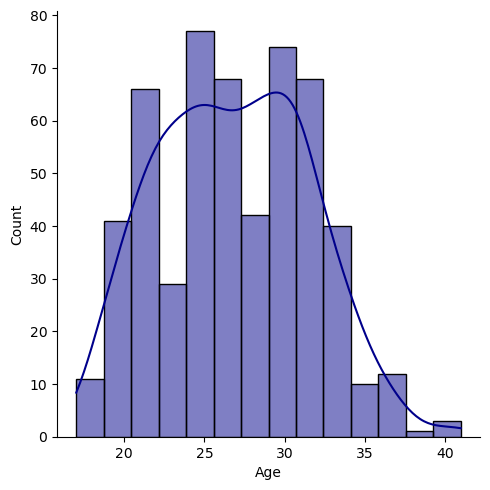

In [15]:
# Density Plot and Histogram of all age groups with count
sns.displot(laliga['Age'], kde=True, color = 'darkblue')

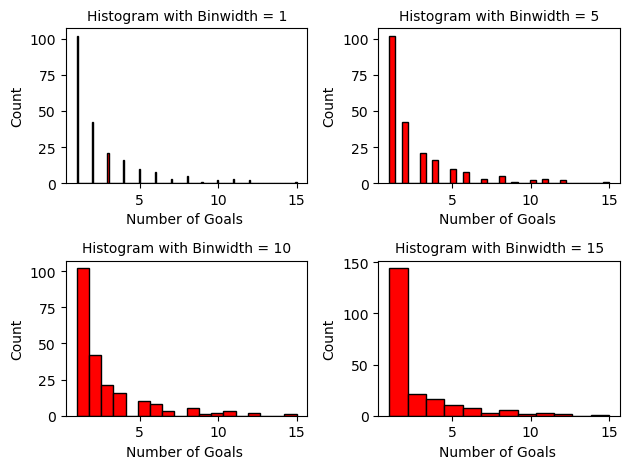

In [16]:
#Plotting Histograms for the count of attribute children with diffent bin sizes
for i, binwidth in enumerate([1, 5, 10, 15]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(laliga['Goals'], bins = int(180/binwidth),
             color = 'red', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 10)
    ax.set_xlabel('Number of Goals ', size = 10)
    ax.set_ylabel('Count', size= 10)

plt.tight_layout()
plt.show()

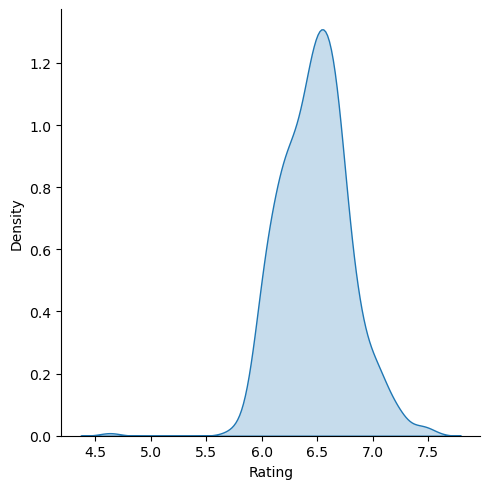

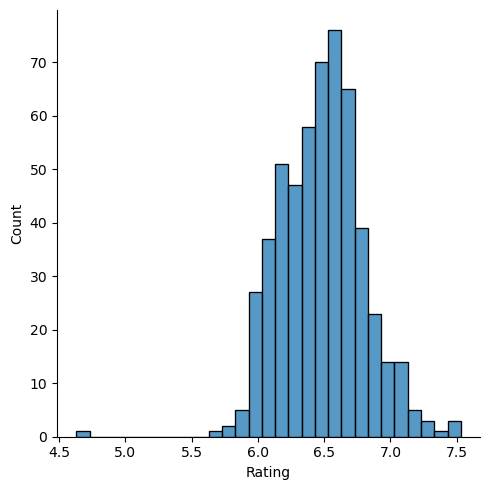

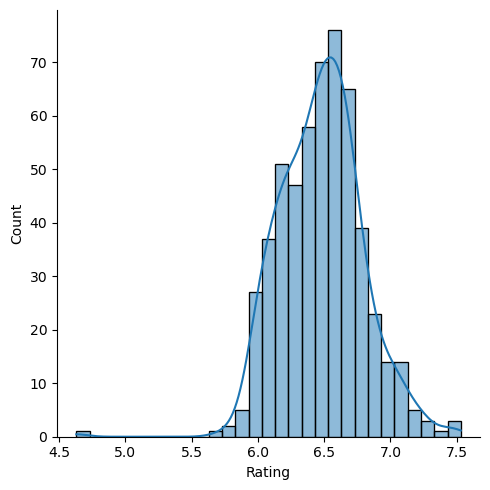

In [17]:
#Different ways of plotting the density graph for the attribute charges, https://seaborn.pydata.org/tutorial/distributions.html
sns.displot(laliga, x=laliga['Rating'], kind="kde", fill=True)
sns.displot(laliga, x=laliga['Rating'], kind="hist")
sns.displot(laliga, x=laliga['Rating'], kde=True)

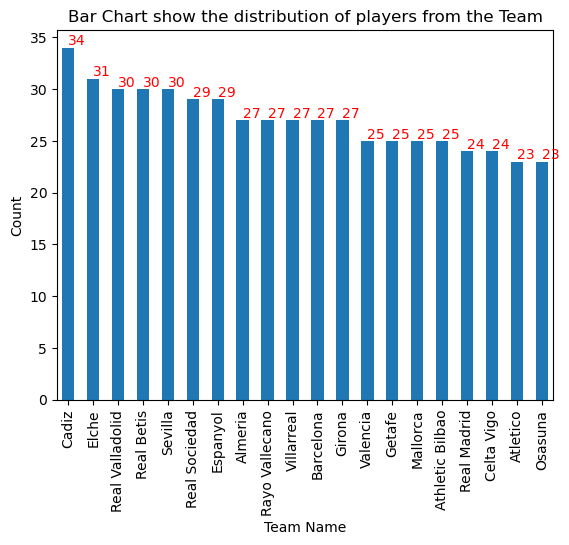

In [18]:
#Now we try to plot the bar chart for different categories present in the attribute Region using Matplotlib
laliga['Team-name'].value_counts().plot(kind='bar')
#Add count over the top of bar
ax=laliga['Team-name'].value_counts().plot.bar(width=.4)
for i, v in laliga['Team-name'].value_counts().reset_index().iterrows():
    ax.text(i, v['Team-name'] + 0.25, v['Team-name'], color='red')
    
plt.xticks(rotation=90) #Rotate xticks
plt.xlabel('Team Name')
plt.ylabel('Count')
plt.title('Bar Chart show the distribution of players from the Team')
plt.show()

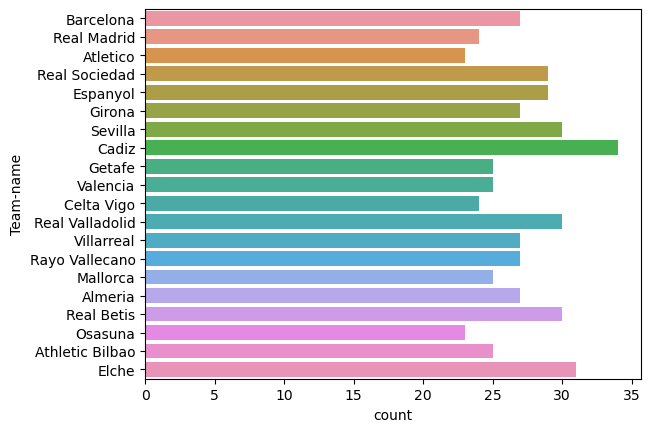

In [19]:
#Plotting the attribute region using seaborn on the y axis
p = sns.countplot(data=laliga,
                  y = 'Team-name',
               )

In [20]:
#Pairplots
#Before we can draw a pariplot the categorical data has to be converted into their respective category codings

laligan = laliga

for x in ['Goals', 'Assist', 'MOTM', 'Rating']:
    laligan[x] = laligan[x].astype('category')

cat_columns = laligan.select_dtypes(['category']).columns #Selecting all category columns
laligan[cat_columns] = laligan[cat_columns].apply(lambda x: x.cat.codes) #Replacing the existing columns with category
laligan.head()


,Player Name,Team-name,Age,Position,App,MinP,Goals,Assist,YC,RC,SPG,PS%,AW,MOTM,Rating
0,Robert Lewandowski,Barcelona,34,FW,20(1),1682,12,4,NaN,1.000,3.800,79,1.600,5,133
1,Karim Benzema,Real Madrid,35,FW,15,1306,10,2,1.000,NaN,4.700,87,0.700,3,132
2,Antoine Griezmann,Atletico,31,AM(CLR) FW,18(7),1693,7,6,NaN,NaN,2.600,81.5,0.800,4,132
3,Vinícius Júnior,Real Madrid,22,AM(L) FW,24,2122,7,3,8.000,NaN,2.500,82.3,NaN,3,131
4,Pedri,Barcelona,20,AM(CL),18(3),1634,5,-1,2.000,NaN,0.800,88.5,NaN,2,130


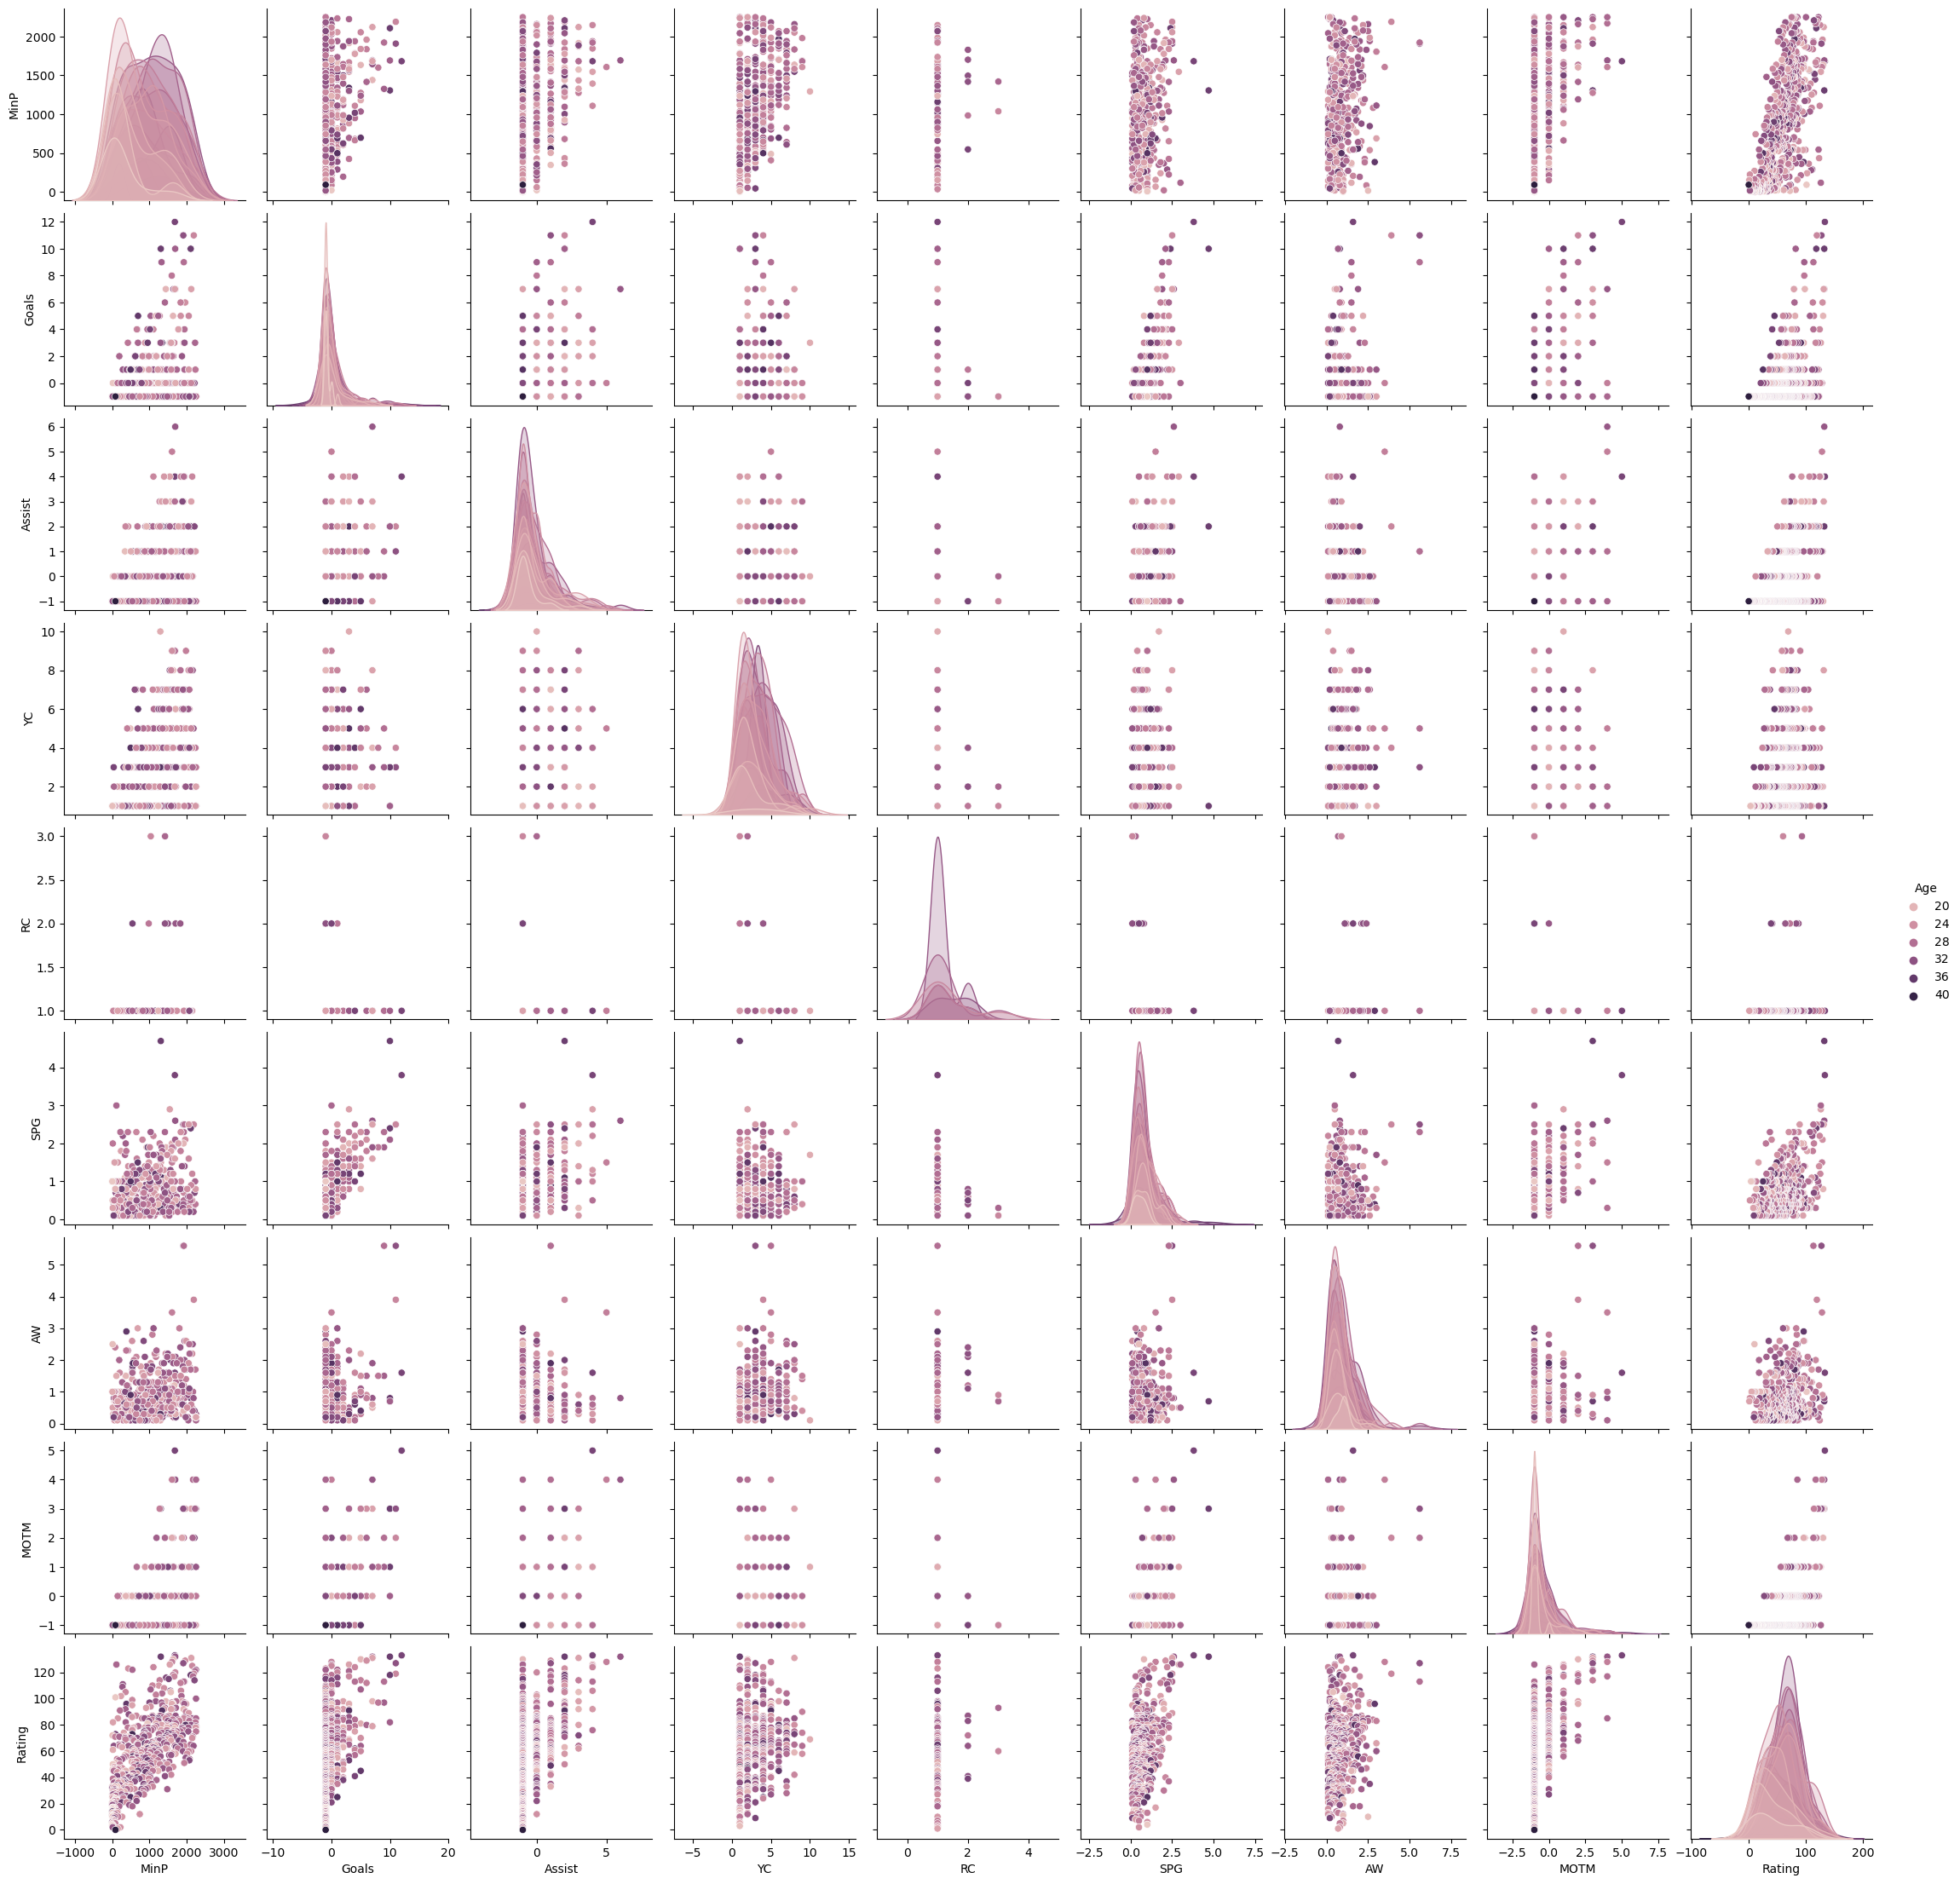

In [21]:
sns.pairplot(laligan, hue  = 'Age')

<AxesSubplot:>

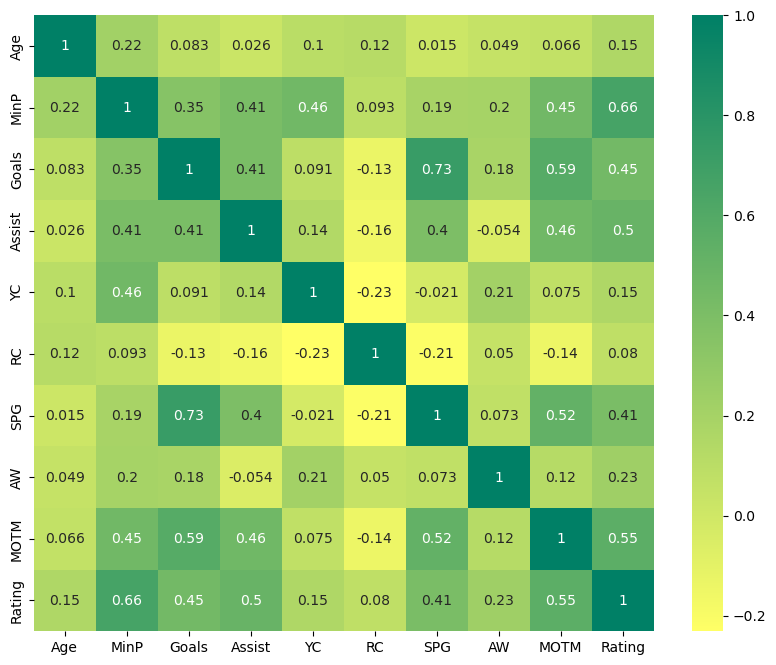

In [22]:
#Plotting Heatmap for Correlation between different attributes
corr = laligan.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap = 'summer_r')
#Higher the value more correlated the two variables

# My Goal is to find the best player for each position.
That would be 1 GoalKeeper, 4 Defence, 3 Midfielder and 3 Forward. So we have to subset the data to analyze each position.


In [23]:
laliga['Position'].value_counts()

   D(C)          61
   FW            41
   DMC           38
   Midfielder    33
   GK            33
                 ..
   D(L) DMC       1
   D(LR)          1
   D(CR) DMC      1
DMC               1
   D(L) M(LR)     1
Name: Position, Length: 68, dtype: int64

# Inorder to be top, you have to have at least one man of the match award

In [24]:
#Dropping Null Values for MOTM = 0 in the dataset
laligamotm = laliga.dropna(subset =['MOTM'], inplace=True)
print(laliga.isnull().sum()) #Sum of missing values after removal 

Player Name      0
Team-name        0
Age              0
Position         0
App              1
MinP             0
Goals            0
Assist           0
YC             148
RC             450
SPG            102
PS%              0
AW              86
MOTM             0
Rating           0
dtype: int64


In [25]:
laligaGK = laligamotm[laligamotm['Position'].str.contains(GK,case=False)]

TypeError: 'NoneType' object is not subscriptable

In [26]:
laliga['Position'] = laliga['Position'].str.strip()

In [27]:
laligaGK = laliga[laliga['Position'].str.contains('GK',case=False)]

In [28]:
laligaGK

,Player Name,Team-name,Age,Position,App,MinP,Goals,Assist,YC,RC,SPG,PS%,AW,MOTM,Rating
13,Jeremías Ledesma,Cadiz,30,GK,25,2250,-1,-1,1.000,NaN,NaN,44.5,0.300,3,122
23,Jordi Masip,Real Valladolid,34,GK,17,1518,-1,-1,2.000,NaN,NaN,67.8,0.400,0,115
32,Marko Dmitrovic,Sevilla,31,GK,2(2),278,-1,-1,2.000,NaN,NaN,63.9,0.300,-1,109
44,Marc-André ter Stegen,Barcelona,30,GK,25,2250,-1,-1,NaN,NaN,NaN,82.5,0.200,-1,100
45,Iván Villar,Celta Vigo,25,GK,6,540,-1,-1,NaN,NaN,NaN,61.4,NaN,-1,99
47,Aitor Fernández,Osasuna,31,GK,13,1170,-1,-1,1.000,NaN,NaN,58.1,0.200,0,98
64,Thibaut Courtois,Real Madrid,30,GK,19,1710,-1,-1,NaN,NaN,NaN,82.6,0.300,-1,93
68,Fernando Pacheco,Espanyol,30,GK,4,360,-1,-1,NaN,NaN,NaN,61.3,NaN,-1,92
94,David Soria,Getafe,29,GK,25,2250,-1,-1,1.000,NaN,NaN,51.8,0.100,4,85
114,Rui Silva,Real Betis,29,GK,19,1710,-1,-1,2.000,NaN,NaN,64.1,0.200,0,81


# Checking Statistics for different data types

In [29]:
laligaGK.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 13 to 541
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player Name  33 non-null     object 
 1   Team-name    33 non-null     object 
 2   Age          33 non-null     int64  
 3   Position     33 non-null     object 
 4   App          33 non-null     object 
 5   MinP         33 non-null     int64  
 6   Goals        33 non-null     int8   
 7   Assist       33 non-null     int8   
 8   YC           22 non-null     float64
 9   RC           1 non-null      float64
 10  SPG          0 non-null      float64
 11  PS%          33 non-null     object 
 12  AW           20 non-null     float64
 13  MOTM         33 non-null     int8   
 14  Rating       33 non-null     int16  
dtypes: float64(4), int16(1), int64(2), int8(3), object(5)
memory usage: 3.3+ KB


# Checking for Outliers

<AxesSubplot:xlabel='Rating'>

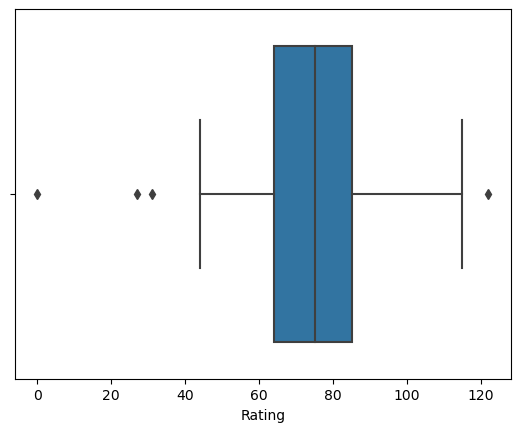

In [30]:
#Detecting Outlier, can be only applied to numeric values
sns.boxplot(x=laligaGK['Rating'])

Observation: No outliers in Rating attribute


In [31]:
#Defining Quartiles for removal of outliers
Q1 = laligaGK['Rating'].quantile(0.25) 
Q3 = laligaGK['Rating'].quantile(0.75)
IQR = Q3 - Q1 #IQR stands for Interquartile Range(IQR), i.e. difference between teh 75th and 25th pecentiles, further info on IQR: https://online.stat.psu.edu/stat200/lesson/3/3.2
total_outlier_num = ((laligaGK['Rating'] < (Q1 - 1.5 * IQR)) | (laligaGK['Rating'] > (Q3 + 1.5 * IQR))).sum()
#print(IQR)
print("Total Number of Outliers in Rating: {}".format(total_outlier_num))

Total Number of Outliers in Rating: 4


<AxesSubplot:xlabel='MOTM'>

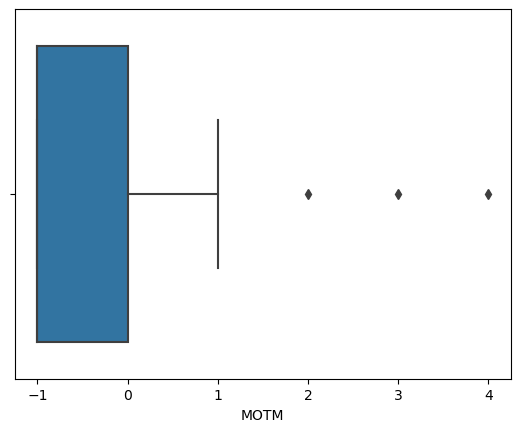

In [32]:
#Detecting Outlier, can be only applied to numeric values
sns.boxplot(x=laligaGK['MOTM'])

In [33]:
#Defining Quartiles for removal of outliers
Q1 = laligaGK['MOTM'].quantile(0.25) 
Q3 = laligaGK['MOTM'].quantile(0.75)
IQR = Q3 - Q1 #IQR stands for Interquartile Range(IQR), i.e. difference between teh 75th and 25th pecentiles, further info on IQR: https://online.stat.psu.edu/stat200/lesson/3/3.2
total_outlier_num = ((laligaGK['MOTM'] < (Q1 - 1.5 * IQR)) | (laligaGK['MOTM'] > (Q3 + 1.5 * IQR))).sum()
#print(IQR)
print("Total Number of Outliers in MOTM: {}".format(total_outlier_num))


Total Number of Outliers in MOTM: 3


In [34]:
#Person with the highest MOTM
laligaGK[laligaGK['MOTM'] == laligaGK['MOTM'].max()]

,Player Name,Team-name,Age,Position,App,MinP,Goals,Assist,YC,RC,SPG,PS%,AW,MOTM,Rating
94,David Soria,Getafe,29,GK,25,2250,-1,-1,1.000,NaN,NaN,51.8,0.100,4,85


In [35]:
#Person with the highest MOTM
laligaGK[laligaGK['Rating'] == laligaGK['Rating'].max()]

,Player Name,Team-name,Age,Position,App,MinP,Goals,Assist,YC,RC,SPG,PS%,AW,MOTM,Rating
13,Jeremías Ledesma,Cadiz,30,GK,25,2250,-1,-1,1.000,NaN,NaN,44.5,0.300,3,122


Looking at this data, we will choose Jeremías Ledesma as our main Goal Keeper. We will store this as GK best.



In [36]:
GKbest = laligaGK[laligaGK['Rating'] == laligaGK['Rating'].max()]
GKbest

,Player Name,Team-name,Age,Position,App,MinP,Goals,Assist,YC,RC,SPG,PS%,AW,MOTM,Rating
13,Jeremías Ledesma,Cadiz,30,GK,25,2250,-1,-1,1.000,NaN,NaN,44.5,0.300,3,122


# Same process will be carried out for the Forwarder

In [37]:
laligaF = laliga[laliga['Position'].str.contains('FW',case=False)]

In [38]:
laligaF

,Player Name,Team-name,Age,Position,App,MinP,Goals,Assist,YC,RC,SPG,PS%,AW,MOTM,Rating
0,Robert Lewandowski,Barcelona,34,FW,20(1),1682,12,4,NaN,1.000,3.800,79,1.600,5,133
1,Karim Benzema,Real Madrid,35,FW,15,1306,10,2,1.000,NaN,4.700,87,0.700,3,132
2,Antoine Griezmann,Atletico,31,AM(CLR) FW,18(7),1693,7,6,NaN,NaN,2.600,81.5,0.800,4,132
3,Vinícius Júnior,Real Madrid,22,AM(L) FW,24,2122,7,3,8.000,NaN,2.500,82.3,NaN,3,131
7,Joselu,Espanyol,32,FW,21(23),1909,11,1,3.000,NaN,2.500,61.6,5.600,3,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,Awer Mabil,Cadiz,27,AM(LR) FW,1(4),163,-1,-1,NaN,NaN,0.600,72.7,0.200,-1,10
526,Jaime Mata,Getafe,34,FW,1(9),43,-1,-1,3.000,NaN,0.100,72.2,0.200,-1,9
527,Fernando Niño,Villarreal,22,FW,0(3),19,-1,-1,NaN,NaN,0.300,100,NaN,-1,8
529,Selim Amallah,Real Valladolid,26,AM(CL) FW,0(2),55,-1,-1,NaN,1.000,0.500,73.9,1.000,-1,7


# Checking Statistics for different data types

In [39]:
laligaF.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 539
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player Name  118 non-null    object 
 1   Team-name    118 non-null    object 
 2   Age          118 non-null    int64  
 3   Position     118 non-null    object 
 4   App          118 non-null    object 
 5   MinP         118 non-null    int64  
 6   Goals        118 non-null    int8   
 7   Assist       118 non-null    int8   
 8   YC           90 non-null     float64
 9   RC           18 non-null     float64
 10  SPG          114 non-null    float64
 11  PS%          118 non-null    object 
 12  AW           104 non-null    float64
 13  MOTM         118 non-null    int8   
 14  Rating       118 non-null    int16  
dtypes: float64(4), int16(1), int64(2), int8(3), object(5)
memory usage: 11.6+ KB


#### For a Forward player both Goals and Assist matters. We create a new value as FW score which will help us select the top forward player. The calculation is as follows:
FW Score = 3*[Goals] + 2*[Assist]

In [40]:
laligaF['FWScore'] = laligaF['Goals'] * 3 + laligaF['Assist']*2

C:\Users\bibek\AppData\Local\Temp\ipykernel_11700\3896038326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laligaF['FWScore'] = laligaF['Goals'] * 3 + laligaF['Assist']*2


In [41]:
laligaF

,Player Name,Team-name,Age,Position,App,MinP,Goals,Assist,YC,RC,SPG,PS%,AW,MOTM,Rating,FWScore
0,Robert Lewandowski,Barcelona,34,FW,20(1),1682,12,4,NaN,1.000,3.800,79,1.600,5,133,44
1,Karim Benzema,Real Madrid,35,FW,15,1306,10,2,1.000,NaN,4.700,87,0.700,3,132,34
2,Antoine Griezmann,Atletico,31,AM(CLR) FW,18(7),1693,7,6,NaN,NaN,2.600,81.5,0.800,4,132,33
3,Vinícius Júnior,Real Madrid,22,AM(L) FW,24,2122,7,3,8.000,NaN,2.500,82.3,NaN,3,131,27
7,Joselu,Espanyol,32,FW,21(23),1909,11,1,3.000,NaN,2.500,61.6,5.600,3,127,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,Awer Mabil,Cadiz,27,AM(LR) FW,1(4),163,-1,-1,NaN,NaN,0.600,72.7,0.200,-1,10,-5
526,Jaime Mata,Getafe,34,FW,1(9),43,-1,-1,3.000,NaN,0.100,72.2,0.200,-1,9,-5
527,Fernando Niño,Villarreal,22,FW,0(3),19,-1,-1,NaN,NaN,0.300,100,NaN,-1,8,-5
529,Selim Amallah,Real Valladolid,26,AM(CL) FW,0(2),55,-1,-1,NaN,1.000,0.500,73.9,1.000,-1,7,-5


### Printing top 3 strikers with highest FWScore and Storing it


In [42]:
Striker = laligaF.nlargest(3, 'FWScore')

In [43]:
Striker

,Player Name,Team-name,Age,Position,App,MinP,Goals,Assist,YC,RC,SPG,PS%,AW,MOTM,Rating,FWScore
0,Robert Lewandowski,Barcelona,34,FW,20(1),1682,12,4,NaN,1.000,3.800,79,1.600,5,133,44
17,Enes Ünal,Getafe,25,FW,25,2190,11,2,4.000,NaN,2.500,63.6,3.900,2,119,37
7,Joselu,Espanyol,32,FW,21(23),1909,11,1,3.000,NaN,2.500,61.6,5.600,3,127,35


# Analysis for Defender

In [44]:
laligaD= laliga[laliga['Position'].str.contains('D',case=False)]

In [45]:
laligaD.head

<bound method NDFrame.head of            Player Name  Team-name  Age    Position   App  MinP  Goals  Assist  \
10        Aleix García     Girona   25         DMC    25  2148      0       4   
12          Pape Gueye    Sevilla   24         DMC     5   433     -1       2   
14   Gonzalo Escalante      Cadiz   29         DMC   6()   543      1      -1   
16     Frenkie de Jong  Barcelona   25    D(C) DMC   NaN  1693      1       0   
18           José Gayà   Valencia   27   D(L) M(L)    19  1636      0       1   
..                 ...        ...  ...         ...   ...   ...    ...     ...   
535     Roger Martínez   Espanyol   18  Midfielder  0(1)     6     -1      -1   
536        Pape Cheikh      Elche   25         DMC  1(1)    33     -1      -1   
537     Carlos Álvarez    Sevilla   19  Midfielder  0(1)     9     -1      -1   
538      Tomás Alarcón      Cadiz   24         DMC  2(2)   222     -1      -1   
540        John Donald      Elche   22        D(C)  2(1)   151     -1      -1  

In [46]:
#Removing Defensive Midfielder
laligaD= laligaD[laligaD['Position'].str.contains('M',case=False)==False]

In [47]:
laligaD

,Player Name,Team-name,Age,Position,App,MinP,Goals,Assist,YC,RC,SPG,PS%,AW,MOTM,Rating
20,Éder Militão,Real Madrid,25,D(CR),19(2),1668,3,-1,3.000,NaN,0.800,87.9,2.000,1,117
33,Jules Koundé,Barcelona,24,D(CR),16(1),1393,-1,1,1.000,NaN,0.400,89.1,1.300,0,108
38,Alejandro Balde,Barcelona,19,D(LR),19(3),1574,-1,3,2.000,NaN,0.300,91,0.400,-1,105
39,José Giménez,Atletico,28,D(CR),14(2),1341,0,-1,7.000,NaN,1.000,86.8,1.900,1,104
43,Félix Garreta,Real Betis,18,Defender,1,90,-1,-1,NaN,NaN,NaN,87.2,1.000,-1,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,Diego López,Valencia,20,Forward,0(1),9,-1,-1,NaN,NaN,NaN,100,NaN,-1,10
523,Marko Milovanovic,Almeria,19,Forward,0(2),14,-1,-1,1.000,NaN,0.500,44.4,2.500,-1,10
532,Mario Hernández,Rayo Vallecano,24,Defender,0(2),38,-1,-1,NaN,NaN,1.000,77.8,NaN,-1,6
533,Iván Romero,Sevilla,21,Forward,0(1),10,-1,-1,1.000,NaN,NaN,33.3,1.000,-1,5


In [48]:
Defense = laligaD.nlargest(4, 'Rating')

In [49]:
Defense

,Player Name,Team-name,Age,Position,App,MinP,Goals,Assist,YC,RC,SPG,PS%,AW,MOTM,Rating
20,Éder Militão,Real Madrid,25,D(CR),19(2),1668,3,-1,3.000,NaN,0.800,87.9,2.000,1,117
33,Jules Koundé,Barcelona,24,D(CR),16(1),1393,-1,1,1.000,NaN,0.400,89.1,1.300,0,108
38,Alejandro Balde,Barcelona,19,D(LR),19(3),1574,-1,3,2.000,NaN,0.300,91,0.400,-1,105
39,José Giménez,Atletico,28,D(CR),14(2),1341,0,-1,7.000,NaN,1.000,86.8,1.900,1,104


# Analysis for Midfielder

In [50]:
laligaM= laliga[laliga['Position'].str.contains('M',case=False)]

In [51]:
laligaM.head()

,Player Name,Team-name,Age,Position,App,MinP,Goals,Assist,YC,RC,SPG,PS%,AW,MOTM,Rating
2,Antoine Griezmann,Atletico,31,AM(CLR) FW,18(7),1693,7,6,NaN,NaN,2.600,81.5,0.800,4,132
3,Vinícius Júnior,Real Madrid,22,AM(L) FW,24,2122,7,3,8.000,NaN,2.500,82.3,NaN,3,131
4,Pedri,Barcelona,20,AM(CL),18(3),1634,5,-1,2.000,NaN,0.800,88.5,NaN,2,130
5,Federico Valverde,Real Madrid,24,M(CLR),22(),1960,6,1,2.000,NaN,2.100,88.2,0.900,3,129
6,Mikel Merino,Real Sociedad,26,M(C),18(3),1607,0,5,5.000,1.000,1.500,76.8,3.500,4,128


In [52]:
#removing Forward Player
laligaM= laligaM[laligaM['Position'].str.contains('FW',case=False)==False]

In [53]:
laligaM

,Player Name,Team-name,Age,Position,App,MinP,Goals,Assist,YC,RC,SPG,PS%,AW,MOTM,Rating
4,Pedri,Barcelona,20,AM(CL),18(3),1634,5,-1,2.000,NaN,0.800,88.5,NaN,2,130
5,Federico Valverde,Real Madrid,24,M(CLR),22(),1960,6,1,2.000,NaN,2.100,88.2,0.900,3,129
6,Mikel Merino,Real Sociedad,26,M(C),18(3),1607,0,5,5.000,1.000,1.500,76.8,3.500,4,128
10,Aleix García,Girona,25,DMC,25,2148,0,4,1.000,NaN,1.200,89.3,0.500,1,125
12,Pape Gueye,Sevilla,24,DMC,5,433,-1,2,1.000,1.000,1.400,82.8,1.200,0,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,Sergio Reguilón,Atletico,26,D(L) M(L),0(4),85,-1,-1,NaN,1.000,NaN,85.1,0.800,-1,5
535,Roger Martínez,Espanyol,18,Midfielder,0(1),6,-1,-1,NaN,NaN,1.000,100,NaN,-1,4
536,Pape Cheikh,Elche,25,DMC,1(1),33,-1,-1,NaN,1.000,NaN,61.5,NaN,-1,3
537,Carlos Álvarez,Sevilla,19,Midfielder,0(1),9,-1,-1,1.000,NaN,NaN,100,NaN,-1,3


#### For a Midfielder player both Goals and Assist matters. We create a new value as MDscore which will help us select the top Midfileder player. The calculation is as follows:
MDScore = 5*[Goals] + 3*[Assist]

In [54]:
laligaM['MDScore'] = laligaM['Goals'] * 5 + laligaM['Assist']*3
laligaM.head()

,Player Name,Team-name,Age,Position,App,MinP,Goals,Assist,YC,RC,SPG,PS%,AW,MOTM,Rating,MDScore
4,Pedri,Barcelona,20,AM(CL),18(3),1634,5,-1,2.000,NaN,0.800,88.5,NaN,2,130,22
5,Federico Valverde,Real Madrid,24,M(CLR),22(),1960,6,1,2.000,NaN,2.100,88.2,0.900,3,129,33
6,Mikel Merino,Real Sociedad,26,M(C),18(3),1607,0,5,5.000,1.000,1.500,76.8,3.500,4,128,15
10,Aleix García,Girona,25,DMC,25,2148,0,4,1.000,NaN,1.200,89.3,0.500,1,125,12
12,Pape Gueye,Sevilla,24,DMC,5,433,-1,2,1.000,1.000,1.400,82.8,1.200,0,123,1


In [55]:
#Replacing Null value in Goals and Assist by 0
laligaM[["Goals", "Assist"]] = laligaM[["Goals", "Assist"]].fillna(0)

In [56]:
laligaM['MDScore'] = laligaM['Goals'] * 5 + laligaM['Assist']*3
laligaM.head()

,Player Name,Team-name,Age,Position,App,MinP,Goals,Assist,YC,RC,SPG,PS%,AW,MOTM,Rating,MDScore
4,Pedri,Barcelona,20,AM(CL),18(3),1634,5,-1,2.000,NaN,0.800,88.5,NaN,2,130,22
5,Federico Valverde,Real Madrid,24,M(CLR),22(),1960,6,1,2.000,NaN,2.100,88.2,0.900,3,129,33
6,Mikel Merino,Real Sociedad,26,M(C),18(3),1607,0,5,5.000,1.000,1.500,76.8,3.500,4,128,15
10,Aleix García,Girona,25,DMC,25,2148,0,4,1.000,NaN,1.200,89.3,0.500,1,125,12
12,Pape Gueye,Sevilla,24,DMC,5,433,-1,2,1.000,1.000,1.400,82.8,1.200,0,123,1


In [57]:
MidField = laligaM.nlargest(4, 'MDScore')

In [58]:
MidField

,Player Name,Team-name,Age,Position,App,MinP,Goals,Assist,YC,RC,SPG,PS%,AW,MOTM,Rating,MDScore
46,Gabri Veiga,Celta Vigo,20,M(C),17(7),1440,7,2,4.000,1.000,1.900,79.7,0.500,1,98,41
5,Federico Valverde,Real Madrid,24,M(CLR),22(),1960,6,1,2.000,NaN,2.100,88.2,0.900,3,129,33
26,Isi Palazón,Rayo Vallecano,28,AM(R),23(1),1940,4,4,4.000,NaN,2.500,79.7,0.800,-1,113,32
66,Nico Williams,Athletic Bilbao,20,AM(LR),23(1),1916,3,3,1.000,NaN,2.000,78.7,0.400,1,92,24


# Merging the Dataframe

In [59]:
Bestteam = pd.merge(pd.merge(pd.merge(GKbest,Defense, on = 'Rating'),MidField, on = 'Rating'),Striker, on = 'Rating')

C:\Users\bibek\AppData\Local\Temp\ipykernel_11700\2459616318.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'MinP_x', 'PS%_x', 'Assist_x', 'Goals_x', 'RC_x', 'Position_x', 'AW_x', 'App_x', 'Player Name_x', 'YC_x', 'SPG_x', 'MOTM_x', 'Team-name_x', 'Age_x'} in the result is deprecated and will raise a MergeError in a future version.
  Bestteam = pd.merge(pd.merge(pd.merge(GKbest,Defense, on = 'Rating'),MidField, on = 'Rating'),Striker, on = 'Rating')


In [60]:
Bestteam

,Player Name_x,Team-name_x,Age_x,Position_x,App_x,MinP_x,Goals_x,Assist_x,YC_x,RC_x,...,Goals_y,Assist_y,YC_y,RC_y,SPG_y,PS%_y,AW_y,MOTM_y,Rating,FWScore


In [61]:
BestT = pd.merge(GKbest,Defense, on = 'Rating')


In [62]:
BestT

,Player Name_x,Team-name_x,Age_x,Position_x,App_x,MinP_x,Goals_x,Assist_x,YC_x,RC_x,...,App_y,MinP_y,Goals_y,Assist_y,YC_y,RC_y,SPG_y,PS%_y,AW_y,MOTM_y


In [63]:
Bestteam = pd.concat([GKbest, Defense, MidField, Striker], axis=0)

In [64]:
Bestteam

,Player Name,Team-name,Age,Position,App,MinP,Goals,Assist,YC,RC,SPG,PS%,AW,MOTM,Rating,MDScore,FWScore
13,Jeremías Ledesma,Cadiz,30,GK,25,2250,-1,-1,1.000,NaN,NaN,44.5,0.300,3,122,NaN,NaN
20,Éder Militão,Real Madrid,25,D(CR),19(2),1668,3,-1,3.000,NaN,0.800,87.9,2.000,1,117,NaN,NaN
33,Jules Koundé,Barcelona,24,D(CR),16(1),1393,-1,1,1.000,NaN,0.400,89.1,1.300,0,108,NaN,NaN
38,Alejandro Balde,Barcelona,19,D(LR),19(3),1574,-1,3,2.000,NaN,0.300,91,0.400,-1,105,NaN,NaN
39,José Giménez,Atletico,28,D(CR),14(2),1341,0,-1,7.000,NaN,1.000,86.8,1.900,1,104,NaN,NaN
46,Gabri Veiga,Celta Vigo,20,M(C),17(7),1440,7,2,4.000,1.000,1.900,79.7,0.500,1,98,41.000,NaN
5,Federico Valverde,Real Madrid,24,M(CLR),22(),1960,6,1,2.000,NaN,2.100,88.2,0.900,3,129,33.000,NaN
26,Isi Palazón,Rayo Vallecano,28,AM(R),23(1),1940,4,4,4.000,NaN,2.500,79.7,0.800,-1,113,32.000,NaN
66,Nico Williams,Athletic Bilbao,20,AM(LR),23(1),1916,3,3,1.000,NaN,2.000,78.7,0.400,1,92,24.000,NaN
0,Robert Lewandowski,Barcelona,34,FW,20(1),1682,12,4,NaN,1.000,3.800,79,1.600,5,133,NaN,44.000


In [65]:
Bestteam = Bestteam.drop(columns = ["MDScore", "FWScore"])


In [66]:
Bestteam

,Player Name,Team-name,Age,Position,App,MinP,Goals,Assist,YC,RC,SPG,PS%,AW,MOTM,Rating
13,Jeremías Ledesma,Cadiz,30,GK,25,2250,-1,-1,1.000,NaN,NaN,44.5,0.300,3,122
20,Éder Militão,Real Madrid,25,D(CR),19(2),1668,3,-1,3.000,NaN,0.800,87.9,2.000,1,117
33,Jules Koundé,Barcelona,24,D(CR),16(1),1393,-1,1,1.000,NaN,0.400,89.1,1.300,0,108
38,Alejandro Balde,Barcelona,19,D(LR),19(3),1574,-1,3,2.000,NaN,0.300,91,0.400,-1,105
39,José Giménez,Atletico,28,D(CR),14(2),1341,0,-1,7.000,NaN,1.000,86.8,1.900,1,104
46,Gabri Veiga,Celta Vigo,20,M(C),17(7),1440,7,2,4.000,1.000,1.900,79.7,0.500,1,98
5,Federico Valverde,Real Madrid,24,M(CLR),22(),1960,6,1,2.000,NaN,2.100,88.2,0.900,3,129
26,Isi Palazón,Rayo Vallecano,28,AM(R),23(1),1940,4,4,4.000,NaN,2.500,79.7,0.800,-1,113
66,Nico Williams,Athletic Bilbao,20,AM(LR),23(1),1916,3,3,1.000,NaN,2.000,78.7,0.400,1,92
0,Robert Lewandowski,Barcelona,34,FW,20(1),1682,12,4,NaN,1.000,3.800,79,1.600,5,133


In [67]:
print("The Best Lineup with the Stats is: \n")
Bestteam

The Best Lineup with the Stats is: 



,Player Name,Team-name,Age,Position,App,MinP,Goals,Assist,YC,RC,SPG,PS%,AW,MOTM,Rating
13,Jeremías Ledesma,Cadiz,30,GK,25,2250,-1,-1,1.000,NaN,NaN,44.5,0.300,3,122
20,Éder Militão,Real Madrid,25,D(CR),19(2),1668,3,-1,3.000,NaN,0.800,87.9,2.000,1,117
33,Jules Koundé,Barcelona,24,D(CR),16(1),1393,-1,1,1.000,NaN,0.400,89.1,1.300,0,108
38,Alejandro Balde,Barcelona,19,D(LR),19(3),1574,-1,3,2.000,NaN,0.300,91,0.400,-1,105
39,José Giménez,Atletico,28,D(CR),14(2),1341,0,-1,7.000,NaN,1.000,86.8,1.900,1,104
46,Gabri Veiga,Celta Vigo,20,M(C),17(7),1440,7,2,4.000,1.000,1.900,79.7,0.500,1,98
5,Federico Valverde,Real Madrid,24,M(CLR),22(),1960,6,1,2.000,NaN,2.100,88.2,0.900,3,129
26,Isi Palazón,Rayo Vallecano,28,AM(R),23(1),1940,4,4,4.000,NaN,2.500,79.7,0.800,-1,113
66,Nico Williams,Athletic Bilbao,20,AM(LR),23(1),1916,3,3,1.000,NaN,2.000,78.7,0.400,1,92
0,Robert Lewandowski,Barcelona,34,FW,20(1),1682,12,4,NaN,1.000,3.800,79,1.600,5,133
